In [1]:
# 1 Inicio
# 1.1 Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1.2 Abrir los archivos CSV
df_cash = pd.read_csv('extract - cash request - data analyst.csv')
df_fees = pd.read_csv('extract - fees - data analyst - .csv')

# 1.3 Mostrar las primeras filas de los DataFrames
print("\n\033[1m\033[95mPARTE 1: Primeras filas\033[0m")
print("Cash head:")
display(df_cash.head())
print("Fees head:")
display(df_fees.head())


PARTE 1: Primeras filas
Cash head:


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


Fees head:


,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [3]:
# 2. Información de los DataFrames
# 2.1 Mostrar información de los tipos de datos
print("\n\033[1m\033[95mPARTE 2: Descripción estadística\033[0m")
print("Info df_cash:")
print(df_cash.info())
print("----------------------------------------------------------")
print("Info df_fees:")
print(df_fees.info())
print("----------------------------------------------------------")
# 2.2 Mostrar descripción estadística
#print("Descripción estadística de Cash:")
#print(df_cash.describe())
#print("----------------------------------------------------------")
#print("Descripción estadística de Fees:")
#print(df_fees.describe())
#print("----------------------------------------------------------")


PARTE 2: Descripción estadística
Info df_cash:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-nu

In [4]:
# 3. Limpiar fechas para agrupar por meses
# 3.1 Definir las columnas de fechas para Cash y Fees
#print("\n\033[1m\033[95mPARTE 3: Agrupar por meses\033[0m")
date_columns_cash = [
    'created_at', 'updated_at', 'moderated_at', 
    'reimbursement_date', 'cash_request_received_date', 
    'money_back_date', 'send_at', 'reco_creation', 
    'reco_last_update'
]
date_columns_fees = ['created_at', 'updated_at', 'paid_at', 'from_date', 'to_date']

# 3.2 Convertir y normalizar las fechas con pd.to_datetime
for col in date_columns_cash:
    df_cash[col] = pd.to_datetime(df_cash[col], errors='coerce').dt.normalize()
for col in date_columns_fees:
    df_fees[col] = pd.to_datetime(df_fees[col], errors='coerce').dt.normalize()

In [5]:
# 4. Tipos de datos las columnas de fecha de ambos df:
print("\n\033[1m\033[95mPARTE 4: Tipos de datos las columnas de fecha de ambos df:\033[0m")
print("\nTipos de datos de Cash Requests:")
print(df_cash[date_columns_cash].dtypes)
print("\nTipos de datos de Fees:")
print(df_fees[date_columns_fees].dtypes)


PARTE 4: Tipos de datos las columnas de fecha de ambos df:

Tipos de datos de Cash Requests:
created_at                    datetime64[ns, UTC]
updated_at                    datetime64[ns, UTC]
moderated_at                  datetime64[ns, UTC]
reimbursement_date            datetime64[ns, UTC]
cash_request_received_date         datetime64[ns]
money_back_date               datetime64[ns, UTC]
send_at                       datetime64[ns, UTC]
reco_creation                 datetime64[ns, UTC]
reco_last_update              datetime64[ns, UTC]
dtype: object

Tipos de datos de Fees:
created_at    datetime64[ns, UTC]
updated_at    datetime64[ns, UTC]
paid_at       datetime64[ns, UTC]
from_date     datetime64[ns, UTC]
to_date       datetime64[ns, UTC]
dtype: object


In [6]:
# 5.1 Ordenar por 'created_at' en ambos DataFrames
df_cash_sorted = df_cash.sort_values(by='created_at', ascending=True)
df_fees_sorted = df_fees.sort_values(by='created_at', ascending=True)

# 5.2 Mostrar los primeros resultados después de ordenar
print("\n\033[1m\033[95mPARTE 5: Resultados después de ordenar por fecha de creación:\033[0m")
print("Cash sorted by created_at:")
display(df_cash_sorted.head())
print("Fees sorted by created_at:")
display(df_fees_sorted.head())


PARTE 5: Resultados después de ordenar por fecha de creación:
Cash sorted by created_at:


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
7920,3,1.0,canceled,2019-11-19 00:00:00+00:00,2020-12-14 00:00:00+00:00,47.0,NaT,NaN,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT
7260,4,100.0,money_back,2019-12-09 00:00:00+00:00,2020-11-04 00:00:00+00:00,NaN,NaT,1309.0,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT
0,5,100.0,rejected,2019-12-10 00:00:00+00:00,2019-12-11 00:00:00+00:00,804.0,2019-12-11 00:00:00+00:00,NaN,2020-01-09 00:00:00+00:00,NaT,NaT,regular,NaT,NaN,NaT,NaT
4118,13,100.0,direct_debit_rejected,2019-12-10 00:00:00+00:00,2020-11-04 00:00:00+00:00,406.0,2019-12-11 00:00:00+00:00,NaN,NaT,2019-12-12,NaT,regular,NaT,pending,2020-03-20 00:00:00+00:00,2020-03-31 00:00:00+00:00
7785,28,100.0,money_back,2019-12-10 00:00:00+00:00,2020-11-04 00:00:00+00:00,140.0,2019-12-11 00:00:00+00:00,NaN,NaT,NaT,NaT,regular,NaT,NaN,NaT,NaT


Fees sorted by created_at:


,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
1211,46,1858.0,postpone,accepted,NaN,5.0,Postpone Cash Request 1858,2020-05-29 00:00:00+00:00,2020-10-13 00:00:00+00:00,NaT,2020-06-06 00:00:00+00:00,2020-06-09 00:00:00+00:00,before
1252,67,2292.0,postpone,accepted,NaN,5.0,Postpone Cash Request 2292,2020-05-29 00:00:00+00:00,2020-10-13 00:00:00+00:00,NaT,2020-06-07 00:00:00+00:00,2020-06-22 00:00:00+00:00,before
1214,56,2117.0,postpone,accepted,NaN,5.0,Postpone Cash Request 2117,2020-05-29 00:00:00+00:00,2020-10-13 00:00:00+00:00,NaT,NaT,NaT,before
20555,60,1503.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 1503,2020-05-29 00:00:00+00:00,2021-01-19 00:00:00+00:00,NaT,2020-06-19 00:00:00+00:00,2020-07-04 00:00:00+00:00,before
1231,57,1503.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 1503,2020-05-29 00:00:00+00:00,2021-01-19 00:00:00+00:00,NaT,2020-07-04 00:00:00+00:00,2020-07-19 00:00:00+00:00,before


In [7]:
# 6 Creacion de cohortes
print("\n\033[1m\033[95mPARTE 6: Creación de cohortes\033[0m")
# 6.1 Llenar valores nulos de 'user_id' con 'deleted_account_id'
df_cash['user_id'] = df_cash['user_id'].fillna(df_cash['deleted_account_id'])

# 6.2 Eliminar filas con user_id aún nulos
df_cash = df_cash[~df_cash['user_id'].isna()]

# 6.3 Agrupar por user_id y obtener la primera fecha de created_at
cohorts = df_cash.groupby('user_id')['created_at'].min().reset_index()
cohorts.rename(columns={'created_at': 'first_created_at'}, inplace=True)

# 6.4 Crear una nueva columna con el formato de mes y año
cohorts['cohort'] = cohorts['first_created_at'].dt.tz_localize(None).dt.to_period('M').astype(str)

# 6.5 Unir los cohorts al DataFrame original
df_cash = df_cash.merge(cohorts[['user_id', 'cohort']], on='user_id', how='left')

# 6.6 Mostrar los primeros resultados para verificar
display(df_cash[['user_id', 'created_at', 'cohort']].head())


PARTE 6: Creación de cohortes


,user_id,created_at,cohort
0,804.0,2019-12-10 00:00:00+00:00,2019-12
1,231.0,2019-12-10 00:00:00+00:00,2019-12
2,191.0,2019-12-10 00:00:00+00:00,2019-12
3,761.0,2019-12-10 00:00:00+00:00,2019-12
4,7686.0,2020-05-06 00:00:00+00:00,2020-05


In [8]:
# 7. Ordenar el DataFrame df_cash por la columna created_at
df_cash_sorted = df_cash.sort_values(by='created_at', ascending=True)

# 7.1 Mostrar los primeros resultados después de ordenar
print("\n\033[1m\033[95mPARTE 7: Ordenar\033[0m")
print("DataFrame cash ordenado por created_at:")
display(df_cash_sorted[['user_id', 'created_at', 'cohort', 'deleted_account_id']])


PARTE 7: Ordenar
DataFrame cash ordenado por created_at:


,user_id,created_at,cohort,deleted_account_id
7920,47.0,2019-11-19 00:00:00+00:00,2019-11,NaN
7260,1309.0,2019-12-09 00:00:00+00:00,2019-12,1309.0
0,804.0,2019-12-10 00:00:00+00:00,2019-12,NaN
4118,406.0,2019-12-10 00:00:00+00:00,2019-12,NaN
7785,140.0,2019-12-10 00:00:00+00:00,2019-12,NaN
...,...,...,...,...
17945,160.0,2020-11-01 00:00:00+00:00,2020-05,NaN
17944,26094.0,2020-11-01 00:00:00+00:00,2020-08,NaN
21083,34866.0,2020-11-01 00:00:00+00:00,2020-09,NaN
18028,23216.0,2020-11-01 00:00:00+00:00,2020-07,NaN



PARTE 8: Distribución de usuarios por cohorte


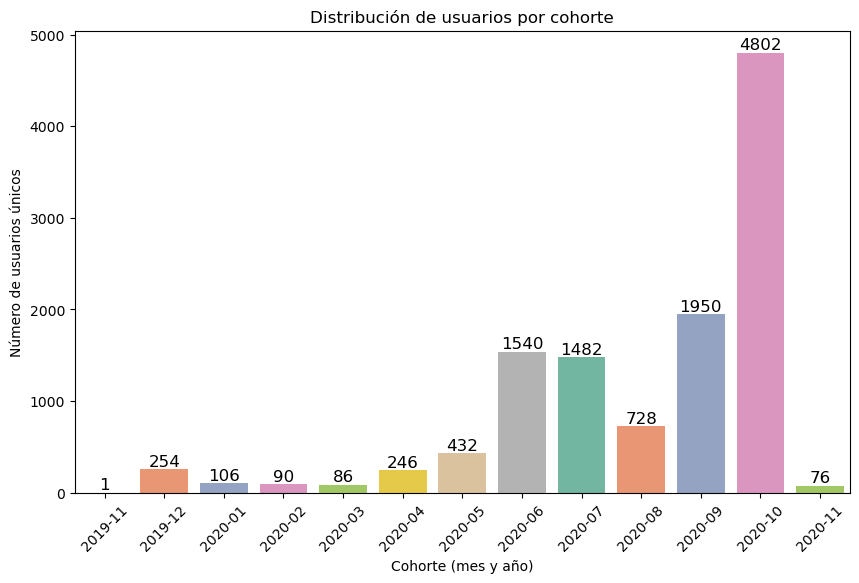

In [9]:
# 8. Gráfico - Distribución de usuarios por cohorte
print("\n\033[1m\033[95mPARTE 8: Distribución de usuarios por cohorte\033[0m")

# Contar usuarios únicos por cohorte
cohort_counts = df_cash.groupby('cohort')['user_id'].nunique()

# 8.1 Visualización de la distribución de usuarios por cohorte
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cohort_counts.index.astype(str), y=cohort_counts.values, hue=cohort_counts.index.astype(str), palette='Set2', legend=False)
plt.title('Distribución de usuarios por cohorte')
plt.xlabel('Cohorte (mes y año)')
plt.ylabel('Número de usuarios únicos')
plt.xticks(rotation=45)

# 8.2 Añadir la cantidad total arriba de cada columna
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.show()

En este primer gráfico se muestra la distribución de usuarios por cohorte según la fecha de su primera operación. Se observa una tendencia creciente en el número de usuarios a lo largo del tiempo. La cohorte de 2020-11 está incompleta, ya que los últimos datos disponibles son del 01/11/2020, por lo que aún queda tiempo en el mes para seguir incorporando nuevos usuarios.


PARTE 9: Frecuencia media por cohorte


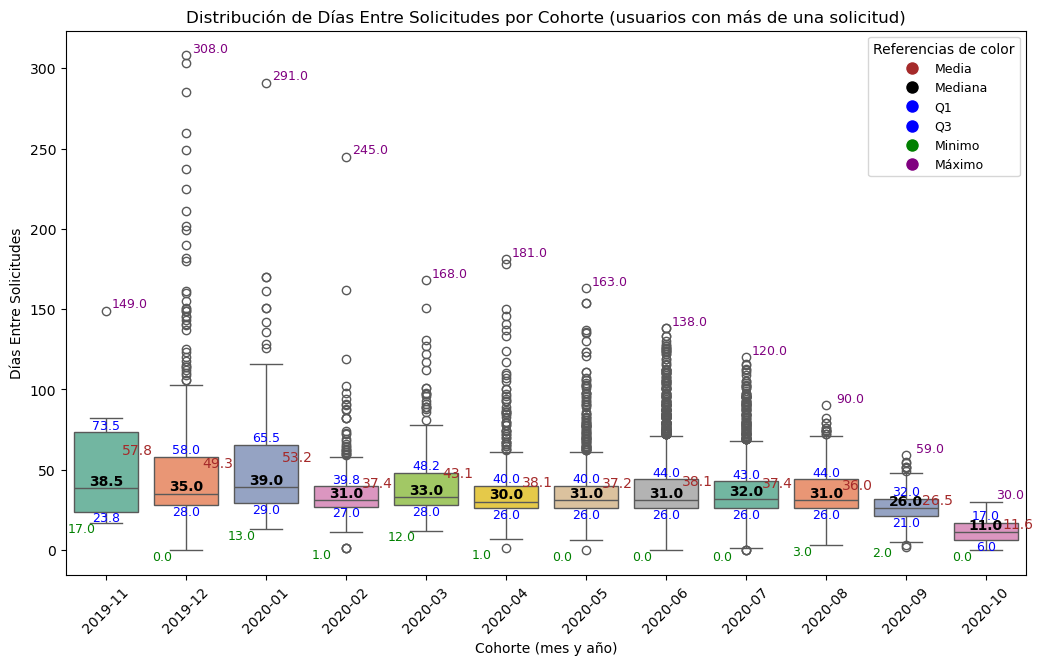

-----------------------------------------------------------------------------------------------------------------------------------------------


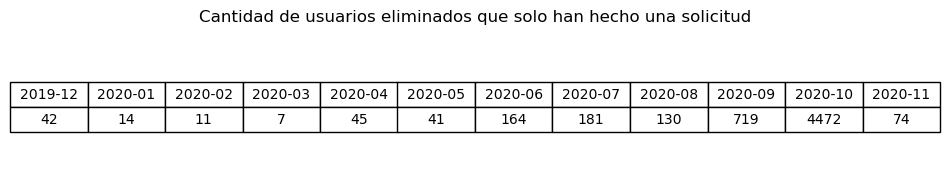

In [11]:
# 9 Frecuencia media por cohorte
print("\n\033[1m\033[95mPARTE 9: Frecuencia media por cohorte\033[0m")
df_cash['created_at'] = pd.to_datetime(df_cash['created_at'])
df_cash['cohort'] = pd.to_datetime(df_cash['cohort'], format='%Y-%m')

# 9.1 Filtrar usuarios que han hecho más de una solicitud efectiva, excluyendo 'rejected' ya que sino influye en la frecuencia. 
                                        #Puesto que habia casos en los que hacian un cash request que era rechazado y en el mismo dia solicitaban otro.
user_counts = df_cash['user_id'].value_counts()
multiple_requests_users = user_counts[user_counts > 1].index
df_cash_filtered = df_cash[(df_cash['status'] != 'rejected') & (df_cash['user_id'].isin(user_counts[user_counts > 1].index))]

# 9.2 Calcular la frecuencia por usuario como la diferencia entre solicitudes
df_cash_filtered = df_cash_filtered.sort_values(by=['user_id', 'created_at'])
df_cash_filtered['days_between'] = df_cash_filtered.groupby('user_id')['created_at'].diff().dt.days.dropna()

# 9.3 Calcular el número de usuarios que solo han hecho una solicitud por cohorte
single_request_users = user_counts[user_counts == 1].index
df_cash_single_request = df_cash[df_cash['user_id'].isin(single_request_users) & (df_cash['status'] != 'rejected')]
single_request_count = df_cash_single_request.groupby('cohort')['user_id'].nunique().reset_index(name='single_request_count')
# Ordenar cronoogicamente los cohortes en el eje x
df_cash_filtered['cohort'] = pd.to_datetime(df_cash_filtered['cohort'])
df_cash_filtered['cohort'] = df_cash_filtered['cohort'].dt.strftime('%Y-%m')
df_cash_filtered = df_cash_filtered.sort_values(by='cohort')
single_request_count['cohort'] = pd.to_datetime(single_request_count['cohort'])
single_request_count = single_request_count.sort_values(by='cohort')

# 9.4 Visualizar el diagrama de cajas por cohort, añadiendo valores clave
plt.figure(figsize=(12, 8))
box_plot = sns.boxplot(x='cohort', y='days_between',hue='cohort', data=df_cash_filtered, palette='Set2')

# 9.5 Calcular y añadir valores clave como cuartiles, mediana, media, máximo y mínimo
stats = df_cash_filtered.groupby('cohort')['days_between'].describe()

for i, cohort in enumerate(stats.index):
    median = stats.loc[cohort, '50%']
    q1 = stats.loc[cohort, '25%']
    q3 = stats.loc[cohort, '75%']
    mean = stats.loc[cohort, 'mean']
    minimum = stats.loc[cohort, 'min']
    maximum = stats.loc[cohort, 'max']
    
    # Desplazar los textos a la derecha
    plt.text(i - 0.0, median, f'{median:.1f}', ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')
    plt.text(i + 0.0, q1, f'{q1:.1f}', ha='center', va='top', color='blue', fontsize=9)
    plt.text(i + 0.0, q3, f'{q3:.1f}', ha='center', va='bottom', color='blue', fontsize=9)
    plt.text(i + 0.4, mean, f'{mean:.1f}', ha='center', va='bottom', color='brown', fontsize=10)
    plt.text(i - 0.3, minimum, f'{minimum:.1f}', ha='center', va='top', color='green', fontsize=9)
    plt.text(i + 0.3, maximum, f'{maximum:.1f}', ha='center', va='bottom', color='purple', fontsize=9)

# 9.6 Ajustes visuales
plt.xticks(rotation=45)
plt.title('Distribución de Días Entre Solicitudes por Cohorte (usuarios con más de una solicitud)')
plt.xlabel('Cohorte (mes y año)')
plt.ylabel('Días Entre Solicitudes')

# 9.7 Agregar leyenda para los colores
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Media', markerfacecolor='brown', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Mediana', markerfacecolor='black', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Q1', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Q3', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Minimo', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Máximo', markerfacecolor='purple', markersize=10)
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=9, title='Referencias de color')

# 9.8 Ajustar el layout para los textos desplazados
plt.subplots_adjust(left=0.1, bottom=0.2)
# 9.9 Mostrar el diagrama
plt.show()

print("-----------------------------------------------------------------------------------------------------------------------------------------------")
# 9.9.1 Crear una nueva figura de tabla horizontal para incluir a los usuarios eliminados
plt.figure(figsize=(12, 2))
table = plt.table(cellText=[single_request_count['single_request_count'].values],
                  colLabels=single_request_count['cohort'].dt.strftime('%Y-%m'),
                  loc='center', cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Ocultar ejes ya que solo mostramos la tabla
plt.axis('off')
plt.title('Cantidad de usuarios eliminados que solo han hecho una solicitud')
# 9.9.2 Mostrar la nueva tabla
plt.show()

Antes de analizar este gráfico, es importante aclarar que hemos excluido del análisis a los usuarios que solo han realizado una transacción, ya que su frecuencia tendería a infinito. Además, hemos decidido omitir las transacciones rechazadas, dado que muchos usuarios solicitaban una nueva solicitud después de una rechazada, lo que podría influir en los resultados.

En el gráfico, observamos que la frecuencia media por cohorte ha ido disminuyendo, lo que indica que los nuevos usuarios están realizando solicitudes en períodos de tiempo cada vez más cortos. Esto sugiere que los usuarios están más cómodos y familiarizados con el proceso. Además, la dispersión de los días entre solicitudes ha ido disminuyendo, concentrándose dentro de rangos más normales de 20 a 30 días. Esto sugiere que el comportamiento de los usuarios se está volviendo más consistente y predecible, lo que podría facilitar la planificación y gestión de recursos en el futuro.


PARTE 10: Analizar ingresos generados por cohorte


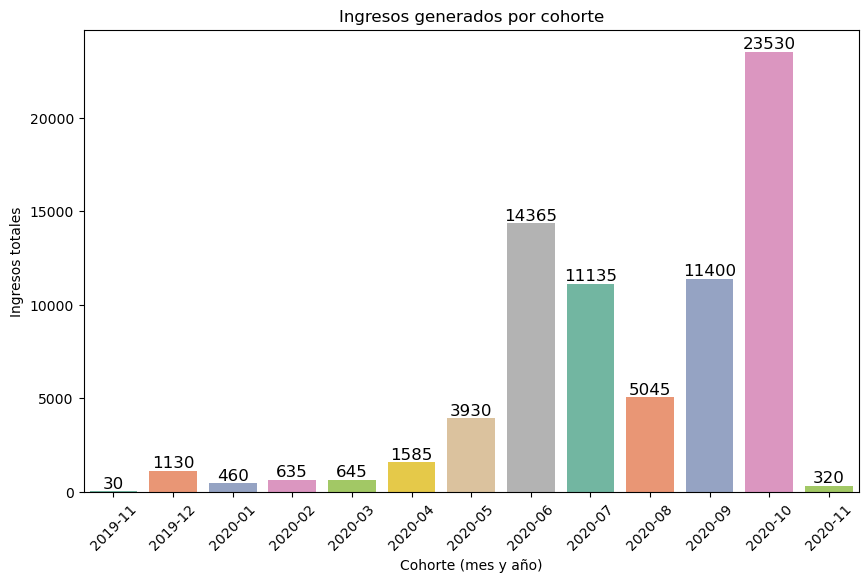

In [13]:
# PARTE 10: Analizar ingresos generados por cohorte
print("\n\033[1m\033[95mPARTE 10: Analizar ingresos generados por cohorte\033[0m")

# 10.1 Hacemos un merge de ambos df 
df_combinados = df_fees.merge(df_cash[['id', 'cohort']], left_on='cash_request_id', right_on='id', how='left')

# 10.2 Verificamos la union de los data frame
#display(df_combinados.head())

# 10.3 Contemplamos solo las comisiones que han sido aceptadas, ya que son las únicas que han generado ingresos registrados.
df_aprobados = df_combinados[(df_combinados['status'] == 'accepted')]

# 10.4 Agrupamos los ingresos por cohorte
ingresos_generados = df_aprobados[["total_amount", "cohort"]].groupby("cohort").sum().reset_index()
ingresos_generados['cohort'] = ingresos_generados['cohort'].dt.strftime('%Y-%m')  # Convertir el formato de la fecha
#print("Ingresos generados por cohorte:")
#display(ingresos_generados)

# 10.5 Graficamos los ingresos generados por cohorte
plt.figure(figsize=(10, 6))
graf_ing = sns.barplot(x='cohort', y='total_amount', hue='cohort', data=ingresos_generados, palette='Set2')
plt.title('Ingresos generados por cohorte')
plt.xlabel('Cohorte (mes y año)')
plt.ylabel('Ingresos totales')
plt.xticks(rotation=45)
for p in graf_ing.patches:
    graf_ing.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()),  
                      ha='center', va='bottom', fontsize=12)  
plt.show()


En este gráfico podemos observar los ingresos generados por cohorte.
Lo que se observa con facilidad es que la forma y tendencia coincide con la distribución de usuarios por cohorte, coincidiendo asi que los cohortes con más usuarios son los que más ingresos generan.


PARTE 11: Distribución de estados de las solicitudes de dinero

Distribución de los estados de las solicitudes de dinero
status
money_back               16397
rejected                  6568
direct_debit_rejected      831
active                      59
transaction_declined        48
direct_debit_sent           34
canceled                    33
Name: count, dtype: int64


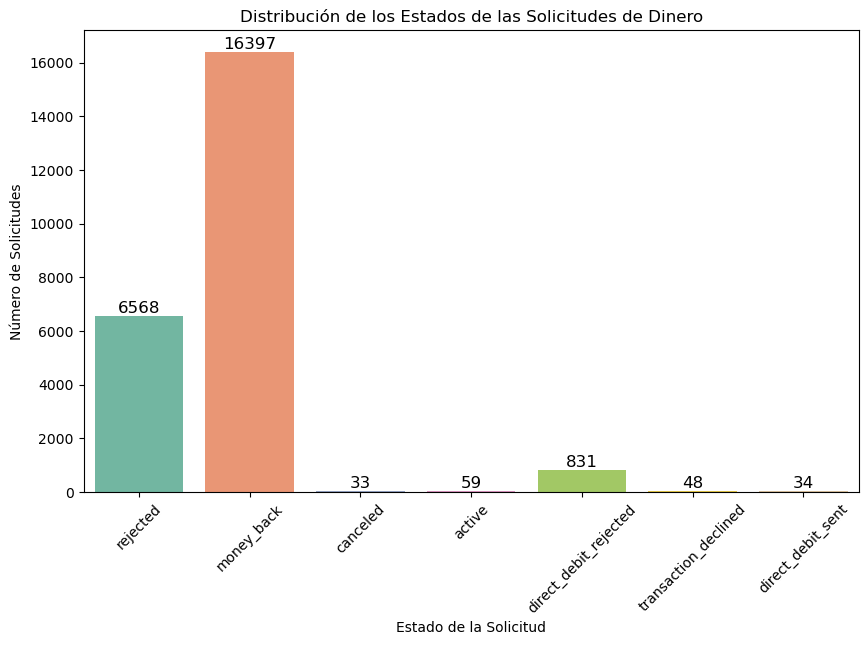

In [16]:
# 11.1 Distribución de los estados actuales
# Para analizar la tasa de incidentes vamos a ver como estan distribuidas las solicitudes de dinero segun sus estados
print("\n\033[1m\033[95mPARTE 11: Distribución de estados de las solicitudes de dinero\033[0m")
status_distribution = df_cash['status'].value_counts()
print("\nDistribución de los estados de las solicitudes de dinero")
print(status_distribution)

# 11.2 Visualización de la distribución de los estados
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='status', data=df_cash, palette='Set2', hue='status', legend=False)  # Asignar hue
plt.title('Distribución de los Estados de las Solicitudes de Dinero')
plt.xlabel('Estado de la Solicitud')
plt.ylabel('Número de Solicitudes')
plt.xticks(rotation=45)

# 11.3 Añadir la cantidad total arriba de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)
plt.show()

Podemos ver que la mayoria de las solicitudes de dinero se han efectuado con exito, sin embargo hay un gran porcentaje de rechazadas.


PARTE 13: Distribución de estado por cohorte


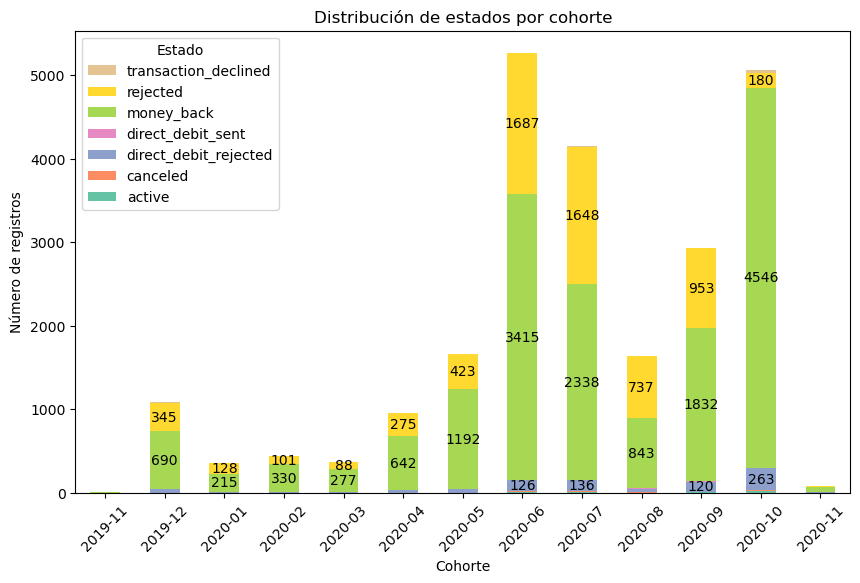

In [18]:
# 13. Distribución de estado por cohorte
# Centrandonos en la agrupacion por cohorte vamos a ver la dsitribucion segun el cohorte
print("\n\033[1m\033[95mPARTE 13: Distribución de estado por cohorte\033[0m")

# 13.1 Crear tabla pivote
cohort_status_counts = df_cash.pivot_table(index='cohort', columns='status', aggfunc='size', fill_value=0)

# 13.2 Usar paleta Set2 de Seaborn
palette = sns.color_palette("Set2")

# 13.3 Graficar
ax = cohort_status_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=palette)
plt.title('Distribución de estados por cohorte')
plt.xlabel('Cohorte')
plt.ylabel('Número de registros')

# Actualizar las etiquetas de las cohortes en el eje X
new_labels = [pd.to_datetime(label).strftime('%Y-%m') for label in cohort_status_counts.index]
ax.set_xticklabels(new_labels, rotation=45)

# 13.4 Ajustar la leyenda para que coincida con el gráfico
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], title='Estado')

# 13.5 Agregar etiquetas solo para los valores mayores a 80
for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(v)}' if v > 80 else '' for v in container.datavalues], label_type='center')

# 13.6 Mostrar el gráfico
plt.show()



Lo que podemos observar es que en todos los cohortes se mantiene una relacion. La mayoria de las solicitudes se efectuaron con éxito, sin embargo todas presentan un porcentaje considerable de incidentes, principalmente por rechazos que deben ser revisados manualmente para su aprobacion.


PARTE 14: Tasas de incidentes por cohorte en %


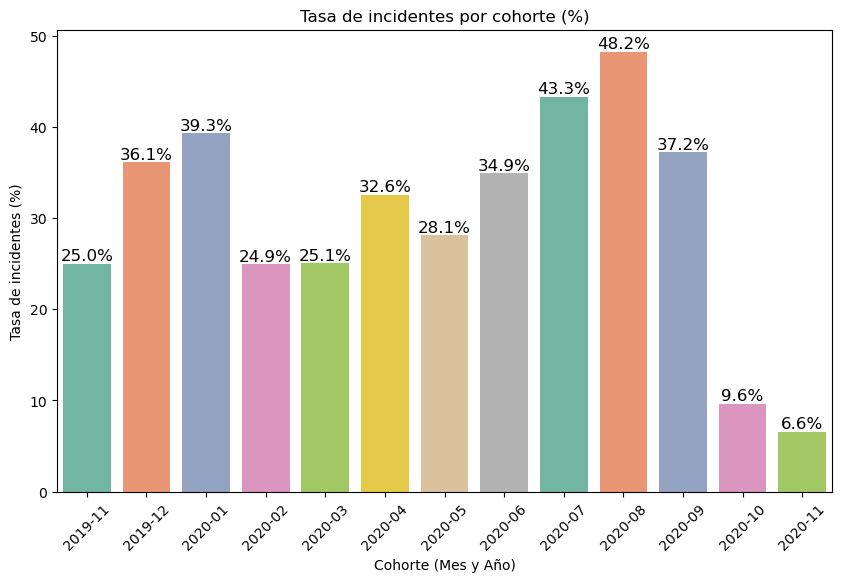

In [20]:
# PARTE 14: Tasas de incidentes por cohorte en %
print("\n\033[1m\033[95mPARTE 14: Tasas de incidentes por cohorte en %\033[0m")

# 14.1 Agregamos una fila con los totales para cada cohorte
cohort_status_counts.loc['Total'] = cohort_status_counts.sum()
# Mostramos el DataFrame con los totales
#print("Distribución de los estados de las solicitudes:")
#display(cohort_status_counts)

# Definir los estados de incidentes a filtrar
# Consideramos incidentes los abajo mencionados ya que impiden que se realice la solicitud de dinero.
incident_status = ['rejected', 'failed', 'canceled', 'error', 'direct_debit_rejected', 'direct_debit_sent', 'transaction_declined']

# 14.2 Filtrar solo los incidentes de pago
incident_df = df_cash[df_cash['status'].isin(incident_status)]

# 14.3 Contar el número de incidentes por cohorte
incident_counts = incident_df.groupby('cohort')['status'].count().reset_index(name='incidents_count')

# 14.4 Obtener el total de solicitudes por cohorte
total_requests = df_cash.groupby('cohort')['status'].count().reset_index(name='total_count')

# 14.5 Combinar ambas tablas para calcular la tasa de incidentes
cohort_incident_rate = incident_counts.merge(total_requests, on='cohort')
cohort_incident_rate['incident_rate'] = (cohort_incident_rate['incidents_count'] / cohort_incident_rate['total_count']) * 100

# Convertir la columna 'cohort' a formato 'AAAA-MM'
cohort_incident_rate['cohort'] = cohort_incident_rate['cohort'].dt.strftime('%Y-%m')

# 14.6 Mostrar la tasa de incidentes por cohorte
#print("Tasa de incidentes por cohorte (%):")
#display(cohort_incident_rate[['cohort', 'incident_rate']])

# 14.7 Visualización de la tasa de incidentes por cohorte
plt.figure(figsize=(10, 6))
graf = sns.barplot(x='cohort', y='incident_rate', hue='cohort', data=cohort_incident_rate, palette='Set2')
plt.xticks(rotation=45)
plt.title('Tasa de incidentes por cohorte (%)')
plt.xlabel('Cohorte (Mes y Año)')
plt.ylabel('Tasa de incidentes (%)')

# Agregar los valores encima de cada barra
for p in graf.patches:
    graf.annotate(f'{p.get_height():.1f}%', 
                  (p.get_x() + p.get_width() / 2., p.get_height()),  
                  ha='center', va='bottom', fontsize=12, color='black')

plt.show()

La tasa de incidentes por cohorte mostró una tendencia al alza entre finales de 2019 y mediados de 2020, alcanzando su máximo en agosto de 2020 con un 48.2%. Sin embargo, a partir de ese punto, las tasas comenzaron a disminuir considerablemente.
Ninguna cohorte superó el 50% de incidentes, pero los picos observados son lo suficientemente significativos como para analizar de donde provienen y asi poder plantear un plan de acción.

In [22]:
# 15 Para tener una visión más clara de dónde vienen estas incidencias, vamos a clasificarlas para en el futuro poder plantear un plan de acción para resulverlas.
# 15.1 Contar el número de incidentes por cohorte y tipo de estado
incident_counts2 = incident_df.groupby(['cohort', 'status']).size().reset_index(name='incidents_count')

# 15.2 Obtener el total de incidentes por cohorte para calcular el porcentaje
total_incidents_per_cohort = incident_counts2.groupby('cohort')['incidents_count'].sum().reset_index(name='total_incidents')

# 15.3 Combinar las tablas para calcular el porcentaje
incident_counts2 = incident_counts2.merge(total_incidents_per_cohort, on='cohort')
incident_counts2['percentage'] = (incident_counts2['incidents_count'] / incident_counts2['total_incidents']) * 100


PARTE 16: Desglose de incidencias por tipo y cantidad


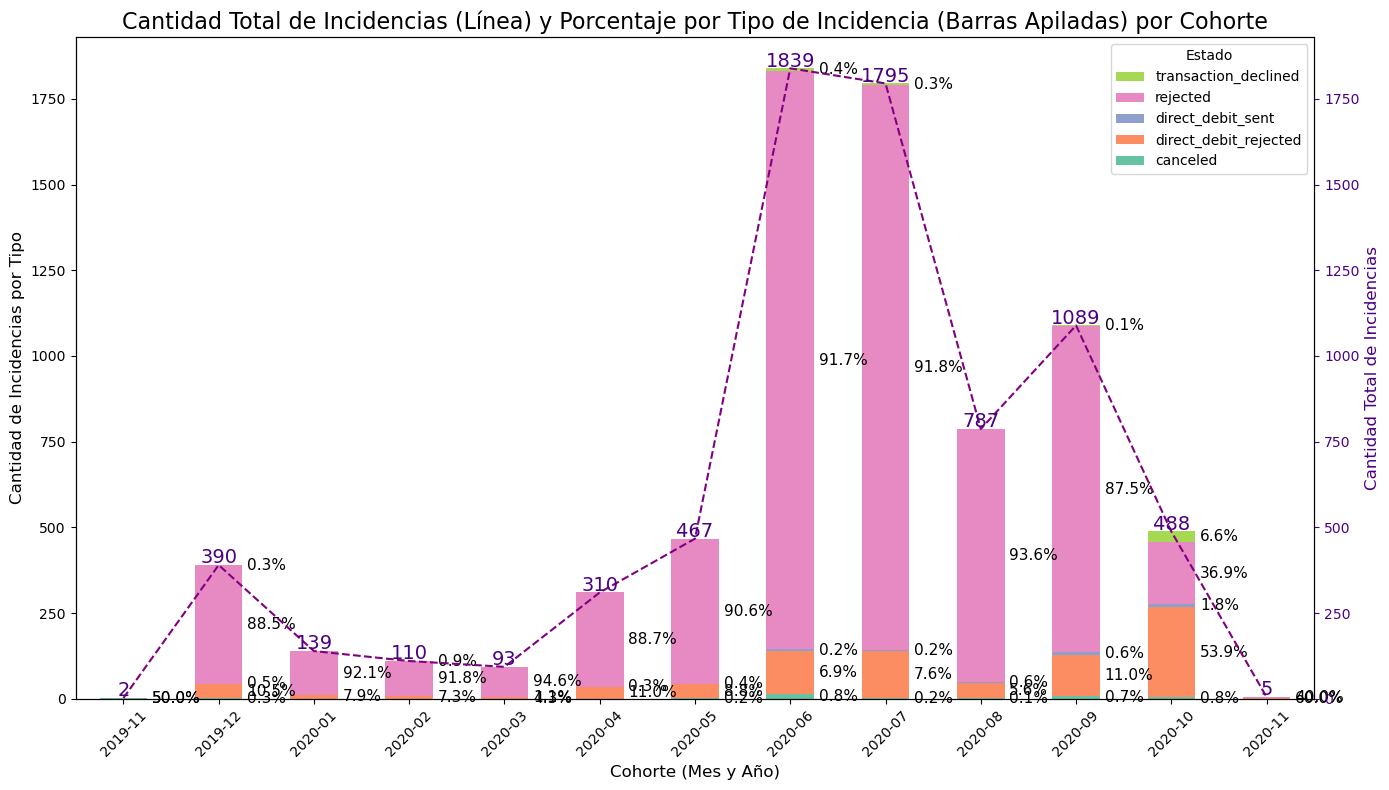

In [23]:
# 16 Desglose de incidencias por tipo y cantidad
print("\n\033[1m\033[95mPARTE 16: Desglose de incidencias por tipo y cantidad\033[0m")

# 16.1 Crear una tabla pivote para obtener la cantidad de incidencias por cohorte y tipo de incidencia
incident_pivot = incident_counts2.pivot_table(index='cohort', columns='status', values='incidents_count', fill_value=0)

# 16.2 Agrupar por cohorte y obtener la cantidad total de incidentes
cohort_incidents = incident_counts2.groupby('cohort').agg(
    total_incidents=('incidents_count', 'sum')
).reset_index()

# 16.3 Crear una figura y un eje
fig, ax1 = plt.subplots(figsize=(14, 8))

# 16.4 Graficar las barras apiladas para la cantidad de incidencias por tipo de incidente
palette = sns.color_palette("Set2")
incident_pivot.plot(kind='bar', stacked=True, ax=ax1, color=palette)

# Convertir 'cohort' a formato datetime si no lo está ya
cohort_incidents['cohort'] = pd.to_datetime(cohort_incidents['cohort'], format='%Y-%m')

# 16.5 Establecer el título y etiquetas del eje y para el gráfico de barras
ax1.set_xlabel('Cohorte (Mes y Año)', fontsize=12)
ax1.set_ylabel('Cantidad de Incidencias por Tipo', fontsize=12)
plt.xticks(rotation=45)

# Formatear las etiquetas del eje X para mostrar solo año y mes
ax1.set_xticklabels(cohort_incidents['cohort'].dt.strftime('%Y-%m'))

# Añadir los porcentajes dentro de las barras
for i in range(len(incident_pivot)):
    total = cohort_incidents['total_incidents'].iloc[i]
    bottom = 0
    for j, val in enumerate(incident_pivot.iloc[i]):
        if val > 0:
            percentage = (val / total) * 100
            ax1.text(i + 0.3, bottom + val / 2, f'{percentage:.1f}%', ha='left', va='center', color='black', fontsize=11)
            bottom += val

# 16.6 Crear un segundo eje y para la cantidad total de incidencias
ax2 = ax1.twinx()

# 16.7 Graficar una línea para la cantidad total de incidencias por cohorte
sns.lineplot(x='cohort', y='total_incidents', data=cohort_incidents, ax=ax2, color='purple', marker='o')

# 16.8 Establecer etiquetas para el segundo eje y (cantidad total de incidencias)
ax2.set_ylabel('Cantidad Total de Incidencias', fontsize=12, color='indigo')
ax2.tick_params('y', colors='indigo')

# Añadir los valores totales encima de la línea
y_values = []
for i, total in enumerate(cohort_incidents['total_incidents']):
    ax2.text(i, total + 5, f'{int(total)}', ha='center', color='indigo', fontsize=14)
    y_values.append(total)

# 16.9 Graficar la línea que conecta los totales
ax2.plot(cohort_incidents.index, y_values, color='purple', linestyle='--', linewidth=1.5)

# 16.9.1 Asegurar que ambos ejes compartan la misma escala
ax2.set_ylim(ax1.get_ylim())

# Invertir el orden de la leyenda
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1], title='Estado')

# 16.9.2 Visualizar gráfico
plt.title('Cantidad Total de Incidencias (Línea) y Porcentaje por Tipo de Incidencia (Barras Apiladas) por Cohorte', fontsize=16)
plt.tight_layout()
plt.show()

En est grafico podemos observar de manera detallada como se clasifican las incidencias. Las incidencias "rejected" dominan el panorama, representando más del 90% de las incidencias en la mayoría de las cohortes, con un pico en junio de 2020. A partir de mayo de 2020, las incidencias de "direct_debit_rejected" comenzaron a ganar relevancia, alcanzando su punto más alto en agosto de 2020. Aunque el número total de incidencias disminuyó desde septiembre de 2020, la proporción de incidencias rechazadas sigue siendo alta, lo que indica que estas son el principal factor a abordar para mejorar la gestión de incidencias.


PARTE 17: Tasa de Conversión de Solicitudes a Ganancias
Tasa de Conversión de Solicitudes a Ganancias: 61.91%


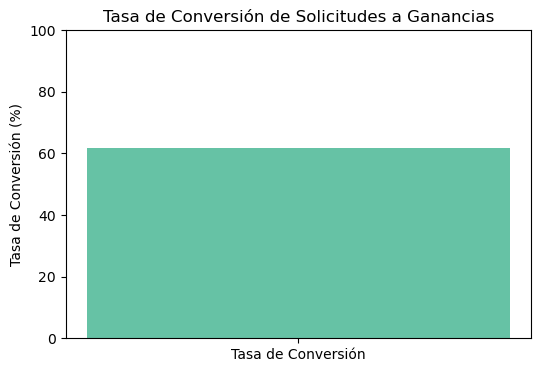

In [26]:
# 17.0 Para hacer un analisis más exhaustivo nos hemos propuesto analizar de dónde provienen nuestras ganancias

print("\n\033[1m\033[95mPARTE 17: Tasa de Conversión de Solicitudes a Ganancias\033[0m")
# 17.1 Calcular el total de solicitudes aceptadas
df_fees_filtered = df_fees[df_fees['status'] == 'accepted']
total_requests_count = df_cash.shape[0]
accepted_requests_count = df_fees_filtered.shape[0]
# 17.2 Calcular la tasa de conversión
conversion_rate = (accepted_requests_count / total_requests_count) * 100
print(f"Tasa de Conversión de Solicitudes a Ganancias: {conversion_rate:.2f}%")
# 17.3 Visualización de la tasa de conversión
plt.figure(figsize=(6, 4))
plt.bar(['Tasa de Conversión'], [conversion_rate], color=palette)
plt.title('Tasa de Conversión de Solicitudes a Ganancias')
plt.ylabel('Tasa de Conversión (%)')
plt.ylim(0, 100)
plt.show()

Solo el 61.91% de las solicitudes de dinero nos generan ganancias.


PARTE 18: Ingresos generados por mes


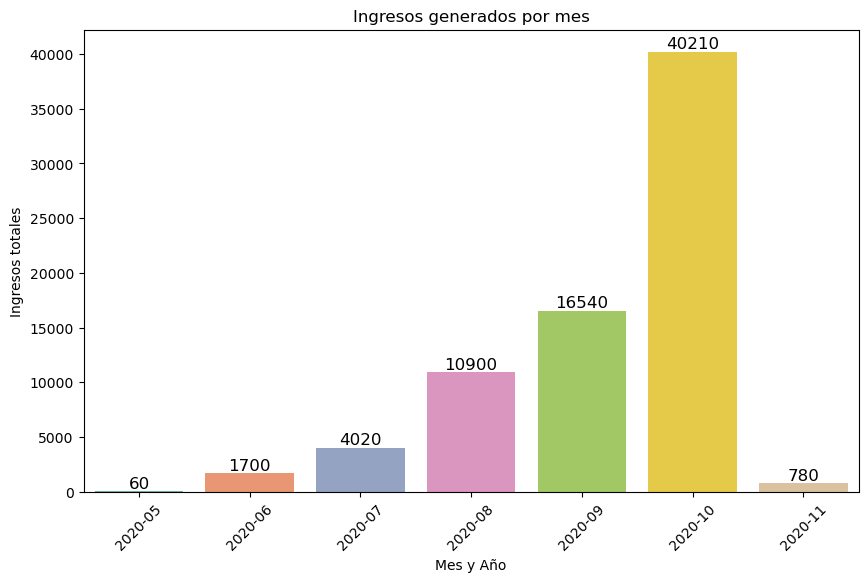

In [29]:
# 18.0 Ingresos generados por mes, en lugar de por cohorte vamos a agruparlo por el mes de la transaccion independientemente del usuario.
print("\n\033[1m\033[95mPARTE 18: Ingresos generados por mes\033[0m")
# 18.1 Agrupamos los ingresos por mes
ingresos_generados_pormes = df_aprobados.groupby(pd.Grouper(key='created_at', freq='ME'))['total_amount'].sum().reset_index()
# 18.3 Verificiamos el df de ingresos_generados_pormes
#print("Ingresos generados por mes:")
#display(ingresos_generados_pormes)
# 18.2 Convertir la columna 'creatd_at' a formato 'AAAA-MM'
ingresos_generados_pormes['created_at'] = ingresos_generados_pormes['created_at'].dt.strftime('%Y-%m')
# 18.3 Graficamos los ingresos generados por mes
plt.figure(figsize=(10, 6))
graf_ing = sns.barplot(x='created_at', y='total_amount', data=ingresos_generados_pormes, hue="created_at", palette='Set2')
plt.title('Ingresos generados por mes')
plt.xlabel('Mes y Año')
plt.ylabel('Ingresos totales')
plt.xticks(rotation=45)
for p in graf_ing.patches:
    graf_ing.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()),  
                      ha='center', va='bottom', fontsize=12)  
plt.show()


A simple vista se observa que las primeras comisiones se han cobrado en mayo del 2020 y que la tendencia es creciente.
La fecha del último ingreso que tenemos es del 01/11/2020 por lo que el mes corriente no esta completo y que aun podrían seguir ingresando comisiones.


In [31]:
#Verificamos a partir de que fecha se han cobrado comisiones, para entender porque los primeros 6 meses no hubo ingresos.
df_aprobados_sorted = df_aprobados.sort_values(by='created_at', ascending=True)
df_aprobados_sorted.head()

,id_x,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment,id_y,cohort
1252,67,2292.0,postpone,accepted,NaN,5.0,Postpone Cash Request 2292,2020-05-29 00:00:00+00:00,2020-10-13 00:00:00+00:00,NaT,2020-06-07 00:00:00+00:00,2020-06-22 00:00:00+00:00,before,2292.0,2020-05-01
1211,46,1858.0,postpone,accepted,NaN,5.0,Postpone Cash Request 1858,2020-05-29 00:00:00+00:00,2020-10-13 00:00:00+00:00,NaT,2020-06-06 00:00:00+00:00,2020-06-09 00:00:00+00:00,before,1858.0,2020-04-01
1212,48,1923.0,postpone,accepted,NaN,5.0,Postpone Cash Request 1923,2020-05-29 00:00:00+00:00,2020-10-13 00:00:00+00:00,NaT,2020-06-06 00:00:00+00:00,2020-06-21 00:00:00+00:00,before,1923.0,2020-04-01
1214,56,2117.0,postpone,accepted,NaN,5.0,Postpone Cash Request 2117,2020-05-29 00:00:00+00:00,2020-10-13 00:00:00+00:00,NaT,NaT,NaT,before,2117.0,2020-05-01
1250,65,2135.0,postpone,accepted,NaN,5.0,Postpone Cash Request 2135,2020-05-29 00:00:00+00:00,2020-10-13 00:00:00+00:00,NaT,2020-06-10 00:00:00+00:00,2020-07-09 00:00:00+00:00,before,2135.0,2020-05-01


In [32]:
# Analizamos porque un usuario del cohorte 2020-01 no habia dado ganancias hasta 2020-05
filas_con_1106 = df_cash[df_cash['user_id'] == 1106.0]
display(filas_con_1106)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,cohort
1211,2062,100.0,money_back,2020-05-20 00:00:00+00:00,2020-06-11 00:00:00+00:00,1106.0,2020-05-20 00:00:00+00:00,NaN,NaT,2020-05-21,2020-06-11 00:00:00+00:00,regular,NaT,NaN,NaT,NaT,2020-01-01
7043,419,100.0,money_back,2020-01-09 00:00:00+00:00,2020-11-04 00:00:00+00:00,1106.0,2020-01-10 00:00:00+00:00,NaN,NaT,2020-01-11,2020-04-14 00:00:00+00:00,regular,NaT,NaN,NaT,NaT,2020-01-01
9255,1312,100.0,money_back,2020-04-21 00:00:00+00:00,2020-11-04 00:00:00+00:00,1106.0,2020-04-21 00:00:00+00:00,NaN,NaT,2020-04-22,2020-05-15 00:00:00+00:00,regular,NaT,NaN,NaT,NaT,2020-01-01
9721,3595,100.0,money_back,2020-06-17 00:00:00+00:00,2020-12-18 00:00:00+00:00,1106.0,2020-06-17 00:00:00+00:00,NaN,NaT,2020-06-18,2020-07-07 00:00:00+00:00,regular,NaT,NaN,NaT,NaT,2020-01-01
13181,7054,100.0,money_back,2020-07-08 00:00:00+00:00,2020-12-18 00:00:00+00:00,1106.0,2020-07-08 00:00:00+00:00,NaN,NaT,2020-07-10,NaT,regular,NaT,NaN,NaT,NaT,2020-01-01
14226,12164,100.0,money_back,2020-08-12 00:00:00+00:00,2020-12-18 00:00:00+00:00,1106.0,2020-08-12 00:00:00+00:00,NaN,NaT,2020-08-13,2020-09-08 00:00:00+00:00,instant,2020-08-19 00:00:00+00:00,NaN,NaT,NaT,2020-01-01
16009,15376,100.0,money_back,2020-09-09 00:00:00+00:00,2020-12-18 00:00:00+00:00,1106.0,2020-09-09 00:00:00+00:00,NaN,NaT,2020-09-10,NaT,instant,2020-09-16 00:00:00+00:00,NaN,NaT,NaT,2020-01-01
23467,21181,100.0,money_back,2020-10-14 00:00:00+00:00,2020-12-18 00:00:00+00:00,1106.0,NaT,NaN,NaT,2020-10-15,2020-11-26 00:00:00+00:00,instant,2020-10-14 00:00:00+00:00,completed,2020-11-20 00:00:00+00:00,2020-11-26 00:00:00+00:00,2020-01-01



PARTE 19: Cantidad de operaciones realizadas por mes y tipo


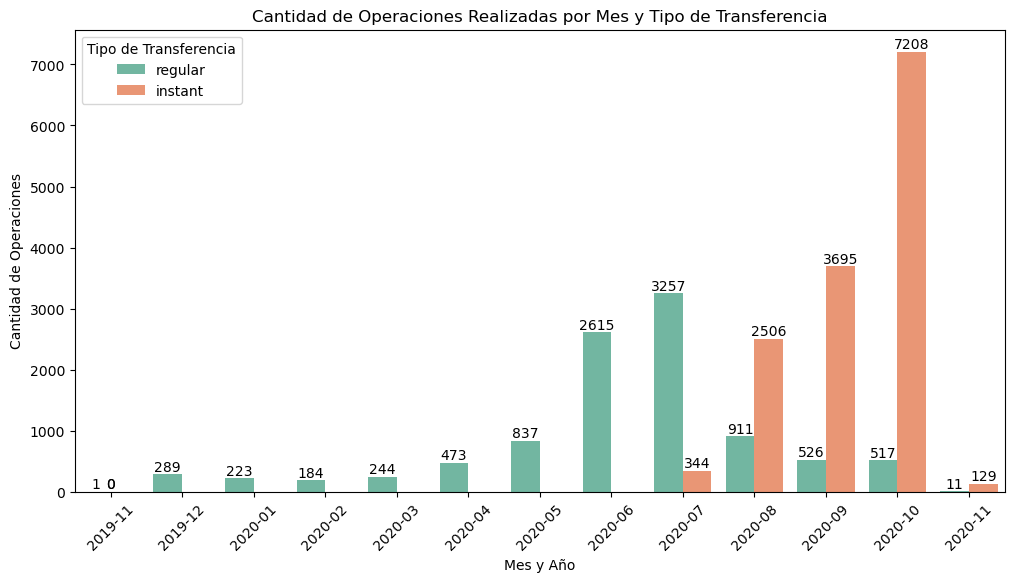

In [33]:
# 19.0 Operaciones realizadas por mes y tipo
# Luego de ver que las primeras transacciones del usuario 1106 fueron de tipo regular, por lo que no se cobraron comisiones, decidimos discriminar las operaciones segun su tipo para entender si este era un fenomeno normal entre los usuarios.
print("\n\033[1m\033[95mPARTE 19: Cantidad de operaciones realizadas por mes y tipo\033[0m")

# 19.1 Agrupamos por mes y transfer_type, contando el número de operaciones
operaciones_por_mes = df_cash.groupby([pd.Grouper(key='created_at', freq='ME'), 'transfer_type']).size().reset_index(name='count')
#print("Cantidad de operaciones realizadas por mes y transfer_type:")
#display(operaciones_por_mes)
operaciones_por_mes['created_at'] = operaciones_por_mes['created_at'].dt.strftime('%Y-%m')
# 19.2 Graficamos 
plt.figure(figsize=(12, 6))
graf_operaciones = sns.barplot(x='created_at', y='count', hue='transfer_type', data=operaciones_por_mes, palette='Set2')
plt.title('Cantidad de Operaciones Realizadas por Mes y Tipo de Transferencia')
plt.xlabel('Mes y Año')
plt.ylabel('Cantidad de Operaciones')
plt.xticks(rotation=45)
for p in graf_operaciones.patches:
    graf_operaciones.annotate(f'{int(p.get_height())}', 
                              (p.get_x() + p.get_width() / 2., p.get_height()),  
                              ha='center', va='bottom', fontsize=10)  
plt.legend(title='Tipo de Transferencia')
plt.show()

Vemos que hasta el mes 06/2020 todas las operaciones fueron de tipo regular por lo que no generan ingresos por si mismas. Y a partir del mes 07/2020 las operaciones de tipo instantaneas han ido en una aumento exponencial.


PARTE 20: Cantidad de operaciones realizadas por mes y tipo, detallando las incidencias


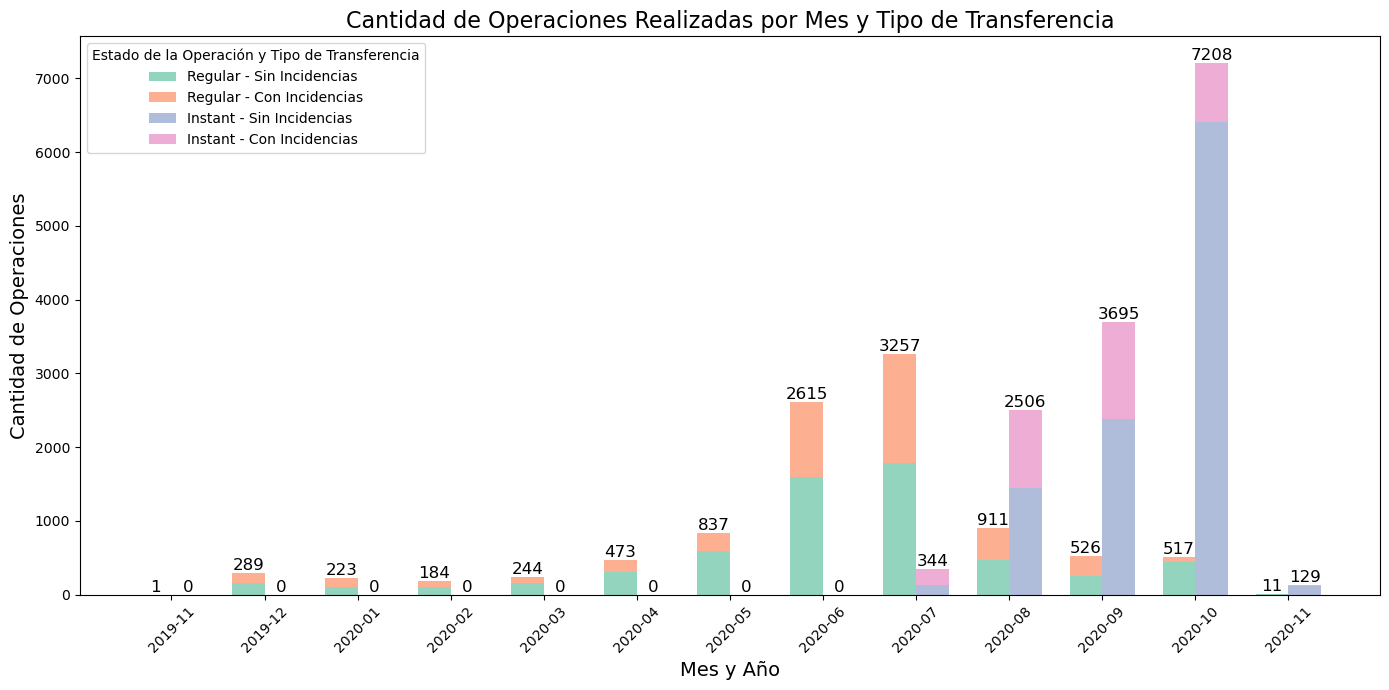

In [36]:
# 20.0 Operaciones realizadas por mes y tipo, discriminando si tienen o no incidencias
# Para entender de donde provenian los ingresos previos a julio de 2020, decidimos discriminar las operaciones con incidencias para ver si exite relacion.

print("\n\033[1m\033[95mPARTE 20: Cantidad de operaciones realizadas por mes y tipo, detallando las incidencias\033[0m")

# 20.1 Agrupamos las operaciones sin incidencias
operaciones_sin_incidencias = (
    df_cash[~df_cash['status'].isin(incident_status)]
    .groupby([pd.Grouper(key='created_at', freq='ME'), 'transfer_type'])
    .size()
    .reset_index(name='count')
)
operaciones_sin_incidencias['tipo'] = 'Sin Incidencias'

# 20.2 Agrupamos las operaciones con incidencias
operaciones_con_incidencias = (
    df_cash[df_cash['status'].isin(incident_status)]
    .groupby([pd.Grouper(key='created_at', freq='ME'), 'transfer_type'])
    .size()
    .reset_index(name='count')
)
operaciones_con_incidencias['tipo'] = 'Con Incidencias'

# 20.3 Combinamos ambos DataFrames
operaciones_combinadas = pd.concat([operaciones_sin_incidencias, operaciones_con_incidencias], ignore_index=True)

# 20.4 Pivotamos el DataFrame para tener una forma adecuada para el gráfico
operaciones_pivot = operaciones_combinadas.pivot_table(index='created_at', columns=['transfer_type', 'tipo'], values='count', fill_value=0)

# 20.5 Graficamos la cantidad de operaciones apiladas por mes
plt.figure(figsize=(14, 7))

# 20.6 Definimos la paleta de colores para que coincida con el resto de los graficos
colors = sns.color_palette('Set2')

# 20.7 Definir posiciones de las barras
bar_width = 0.35
x = range(len(operaciones_pivot.index))

# 20.8 Graficar las operaciones "regular"
plt.bar(x, operaciones_pivot[('regular', 'Sin Incidencias')], width=bar_width, label='Regular - Sin Incidencias', color=colors[0], alpha=0.7)
plt.bar(x, operaciones_pivot[('regular', 'Con Incidencias')], width=bar_width, bottom=operaciones_pivot[('regular', 'Sin Incidencias')], label='Regular - Con Incidencias', color=colors[1], alpha=0.7)

# 20.9 Graficar las operaciones "instant"
plt.bar([p + bar_width for p in x], operaciones_pivot[('instant', 'Sin Incidencias')], width=bar_width, label='Instant - Sin Incidencias', color=colors[2], alpha=0.7)
plt.bar([p + bar_width for p in x], operaciones_pivot[('instant', 'Con Incidencias')], width=bar_width, bottom=operaciones_pivot[('instant', 'Sin Incidencias')], label='Instant - Con Incidencias', color=colors[3], alpha=0.7)

# 20.91 Añadir anotaciones con los totales
for i in x:
    total_regular = operaciones_pivot[('regular', 'Sin Incidencias')].iloc[i] + operaciones_pivot[('regular', 'Con Incidencias')].iloc[i]
    total_instant = operaciones_pivot[('instant', 'Sin Incidencias')].iloc[i] + operaciones_pivot[('instant', 'Con Incidencias')].iloc[i]
    
    plt.annotate(f'{int(total_regular)}', (i, total_regular), ha='center', va='bottom', fontsize=12, color='black')
    plt.annotate(f'{int(total_instant)}', (i + bar_width, total_instant), ha='center', va='bottom', fontsize=12, color='black')

# 20.92 Configuración del gráfico
plt.title('Cantidad de Operaciones Realizadas por Mes y Tipo de Transferencia', fontsize=16)
plt.xlabel('Mes y Año', fontsize=14)
plt.ylabel('Cantidad de Operaciones', fontsize=14)
plt.xticks([p + bar_width / 2 for p in x], operaciones_pivot.index.strftime('%Y-%m'), rotation=45)
plt.legend(title='Estado de la Operación y Tipo de Transferencia', fontsize=10)
plt.tight_layout()
plt.show()





PARTE 21: Ingreso generado por mes y tipo


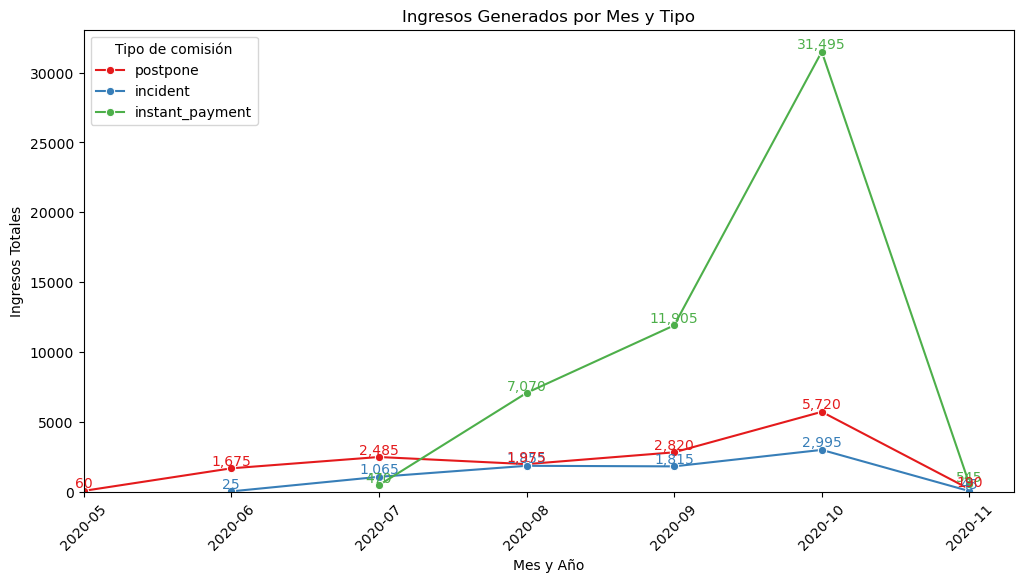

In [37]:
# 21. En busca del origen de los ingresos hemos decidido desglozar los tipos de comisiones por los que nos ingresa dinero
print("\n\033[1m\033[95mPARTE 21: Ingreso generado por mes y tipo\033[0m")
# 21.1 Agrupamos los ingresos por mes y por tipo, sumando las comisiones obtenidas (solo de los pagos aceptados)
ingresos_generados_pormes_y_type = df_aprobados.groupby([pd.Grouper(key='created_at', freq='ME'), 'type'])['total_amount'].sum().reset_index()
# 21.2 Formatear 'created_at' para mostrar solo año y mes
ingresos_generados_pormes_y_type['created_at'] = ingresos_generados_pormes_y_type['created_at'].dt.strftime('%Y-%m')
#print("Ingresos generados por mes y tipo:")
#display(ingresos_generados_pormes_y_type)

# 21.2 Graficamos los ingresos generados por mes subdivididos por tipo
plt.figure(figsize=(12, 6))

# 21.3 Gráfico de líneas con puntos
graf_ing = sns.lineplot(x='created_at', y='total_amount', hue='type', data=ingresos_generados_pormes_y_type, palette='Set1', marker='o')

# 21.4 Configuramos el grafico
plt.xlim(left=0)
plt.title('Ingresos Generados por Mes y Tipo')
plt.xlabel('Mes y Año')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=45)
plt.ylim(bottom=0)

# 21.5 Obtener la paleta de colores utilizada en el gráfico
colors = sns.color_palette('Set1', n_colors=len(ingresos_generados_pormes_y_type['type'].unique()))
for i in range(len(ingresos_generados_pormes_y_type)):
    color = colors[list(ingresos_generados_pormes_y_type['type'].unique()).index(ingresos_generados_pormes_y_type['type'][i])]
    plt.text(x=ingresos_generados_pormes_y_type['created_at'][i], 
             y=ingresos_generados_pormes_y_type['total_amount'][i], 
             s=f'{ingresos_generados_pormes_y_type["total_amount"][i]:,.0f}', 
             ha='center', va='bottom', color=color)
# 21.6 Graficamos
plt.legend(title='Tipo de comisión')
plt.show()


Los ingresos comenzaron a generarse en mayo del 2020, principalmente debido a pagos pospuestos. En junio del 2020 se registró la primera comisión por incidentes. A partir de julio del 2020, se observó un aumento significativo en los ingresos, impulsado principalmente por las comisiones de pagos instantáneos, que rápidamente se convirtieron en la principal fuente de ingresos. Este crecimiento resalta la importancia de las transferencias instantáneas como motor clave del modelo de negocio, demostrando que los usuarios están dispuestos a pagar por la rapidez en el procesamiento de sus operaciones.


PARTE 22: Cantidad de operaciones y ganancias por mes y tipo


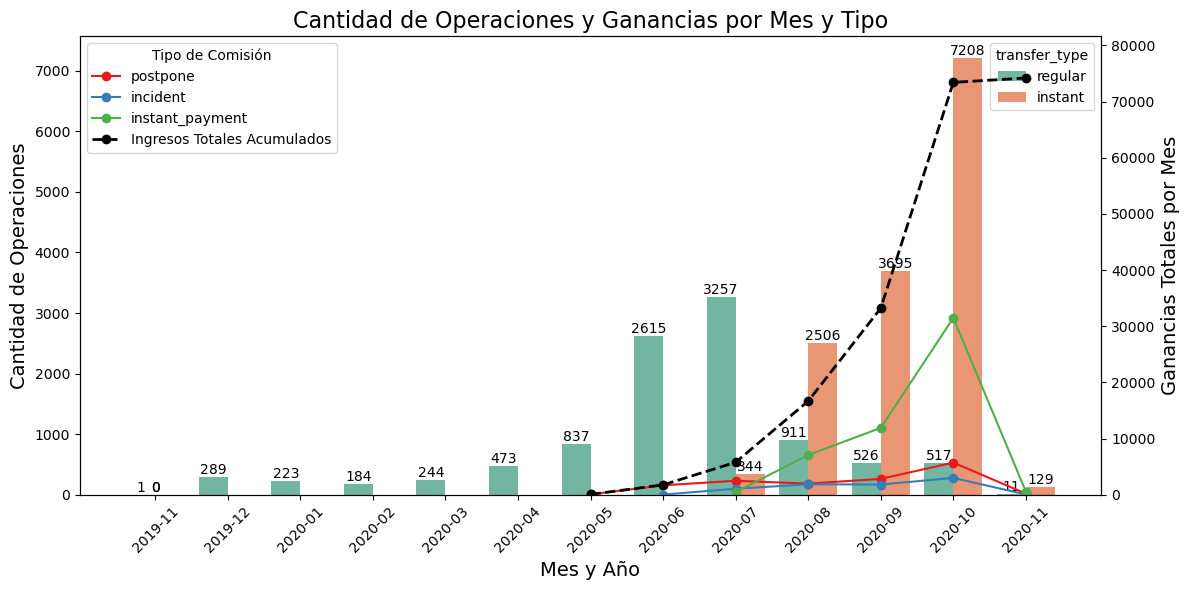

In [40]:
# 22. Para verificar la relación entre comisiones cobradas y operaciones, analizamos ambos gráficos en conjunto.
print("\n\033[1m\033[95mPARTE 22: Cantidad de operaciones y ganancias por mes y tipo\033[0m")

# 22.1 Cálculo de ingresos totales por mes
ingresos_totales_por_mes = (
    ingresos_generados_pormes_y_type
    .groupby('created_at')['total_amount']
    .sum()
    .reset_index()
)

# 22.2 Cálculo de ingresos acumulativos
ingresos_totales_por_mes['total_acumulado'] = ingresos_totales_por_mes['total_amount'].cumsum()

# 22.3 Importar la paleta de colores 'Set1' para que las líneas coincidan con los colores del gráfico anterior
palette = sns.color_palette("Set1")

# 22.4 Configuramos el tamaño del gráfico
plt.figure(figsize=(12, 6))

# 22.5 Gráfico de operaciones
graf_operaciones = sns.barplot(x='created_at', y='count', hue='transfer_type', data=operaciones_por_mes, palette='Set2')
plt.title('Cantidad de Operaciones y Ganancias por Mes y Tipo', fontsize=16)
plt.xlabel('Mes y Año', fontsize=14)
plt.ylabel('Cantidad de Operaciones', fontsize=14)
plt.xticks(rotation=45)

# 22.6 Añadir el segundo eje y para las ganancias
ax2 = graf_operaciones.twinx()

# 22.7 Asignar colores de la paleta 'Set1' a las líneas de ganancias
for i, tipo in enumerate(ingresos_generados_pormes_y_type['type'].unique()):
    data_tipo = ingresos_generados_pormes_y_type[ingresos_generados_pormes_y_type['type'] == tipo]
    ax2.plot(data_tipo['created_at'], data_tipo['total_amount'], 
             marker='o', label=tipo, color=palette[i])

# 22.8 Graficar la línea de ingresos totales acumulativos
ax2.plot(ingresos_totales_por_mes['created_at'], ingresos_totales_por_mes['total_acumulado'], 
         marker='o', color='black', label='Ingresos Totales Acumulados', 
         linewidth=2, linestyle='--')

# 22.9 Asegurar que el eje y derecho comience en 0 y se ajuste
ax2.set_ylim(0, ingresos_totales_por_mes['total_acumulado'].max() * 1.1)
ax2.set_ylabel('Ganancias Totales por Mes', fontsize=14)

# 22.10 Ajustes de leyenda para el segundo eje
ax2.legend(title='Tipo de Comisión', loc='upper left')

# 22.11 Añadir anotaciones sobre las barras del gráfico
for p in graf_operaciones.patches:
    graf_operaciones.annotate(f'{int(p.get_height())}', 
                              (p.get_x() + p.get_width() / 2., p.get_height()),  
                              ha='center', va='bottom', fontsize=10)

# 22.12 Mostrar el gráfico
plt.tight_layout()
plt.show()



El gráfico muestra que las solicitudes de tipo instantáneas son el principal motor de crecimiento tanto en operaciones como en comisiones. A medida que crecen las operaciones instantáneas, también lo hacen las comisiones por "instant_payment", evidenciando una relación directa entre ambas.
Por otro lado, las transferencias regulares tienen un impacto menor, ya que solo generan comisiones por incidentes. Esto sugiere que el crecimiento de la plataforma depende cada vez más de las transferencias instantáneas, clave tanto para el volumen de operaciones como para los ingresos.


PARTE 23: Relación temporal entre los cash request y las comisiones


C:\Users\Flor Guindo\AppData\Local\Temp\ipykernel_13300\310767172.py:70: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  ax1.set_xticks(ganancias_por_pago_fee['paid_at'].dt.to_period('M').unique().astype(str))
C:\Users\Flor Guindo\AppData\Local\Temp\ipykernel_13300\310767172.py:71: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  ax1.set_xticklabels(ganancias_por_pago_fee['paid_at'].dt.to_period('M').unique().astype(str), rotation=45)


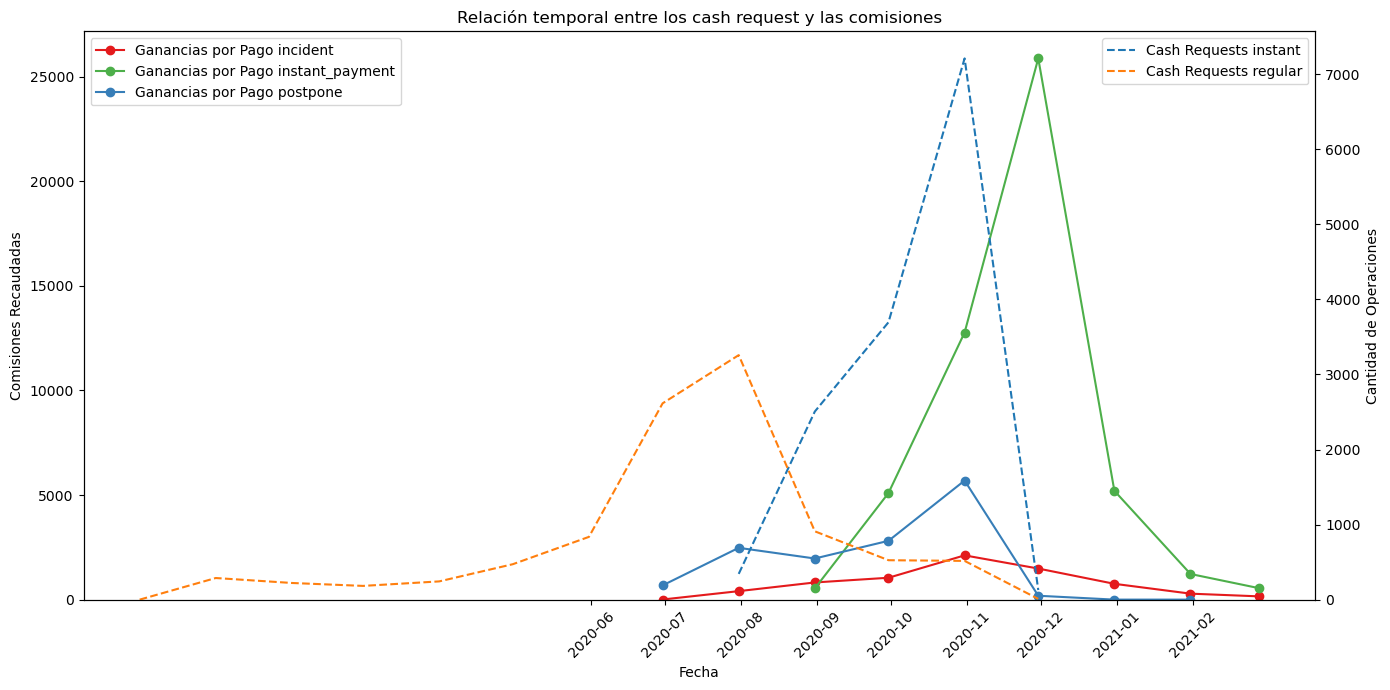

In [75]:
# 23. Para analizar por qué los ingresos de noviembre del 2020 están en 0, analizamos la relación temporal entre el día que se crea la solicitud de dinero y el día que se cobra la comisión.
print("\n\033[1m\033[95mPARTE 23: Relación temporal entre los cash request y las comisiones\033[0m")

# 23.1 Unir los DataFrames de cash y fees para vincular las fechas de solicitud y de cobro
relacion_fechas_df = pd.merge(
    df_cash,
    df_fees[['cash_request_id', 'type', 'status', 'total_amount', 'paid_at']],
    left_on='id',
    right_on='cash_request_id',
    how='inner'
)

# 23.2 Filtrar las comisiones cobradas
comisiones_cobradas = relacion_fechas_df[relacion_fechas_df['status_y'] == 'accepted']

# 23.3 Agrupar comisiones por mes y tipo
ganancias_por_pago_fee = (
    comisiones_cobradas
    .groupby(['type', pd.Grouper(key='paid_at', freq='ME')])['total_amount']
    .sum()
    .reset_index()
)

# 23.4 Agrupar cantidad de cash requests por mes de creación y tipo de transferencia
cr_creacion = (
    df_cash
    .groupby(['transfer_type', pd.Grouper(key='created_at', freq='ME')])['id']
    .count()
    .reset_index(name='cash_requests')
)

# 23.5 Configuración del gráfico
fig, ax1 = plt.subplots(figsize=(14, 7))

# 23.6 Determinar el número total de tipos para los colores
num_fee_types = ganancias_por_pago_fee['type'].nunique()
num_transfer_types = cr_creacion['transfer_type'].nunique()

# 23.7 Elegir la paleta de colores para que coincida visualmente con las líneas anteriores
set1_colors = sns.color_palette('Set1', n_colors=max(num_fee_types, num_transfer_types))

# 23.8 Gráfico de líneas para ganancias por tipo de comisión
for i, fee_type in enumerate(ganancias_por_pago_fee['type'].unique()):
    ganancias_por_tipo = ganancias_por_pago_fee[ganancias_por_pago_fee['type'] == fee_type]
    ax1.plot(ganancias_por_tipo['paid_at'], ganancias_por_tipo['total_amount'],
             marker='o', color=set1_colors[-i], label=f'Ganancias por Pago {fee_type}')

# 23.9 Configuración del eje Y para las comisiones recaudadas
ax1.set_ylabel('Comisiones Recaudadas', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_ylim(bottom=0)  # Eje Y comienza en 0

# 23.10 Configurar un segundo eje Y para la cantidad de cash requests
ax2 = ax1.twinx()

# 23.11 Gráfico de líneas para cash requests
for i, transfer_type in enumerate(cr_creacion['transfer_type'].unique()):
    tipo_cr = cr_creacion[cr_creacion['transfer_type'] == transfer_type]
    ax2.plot(tipo_cr['created_at'], tipo_cr['cash_requests'],
             linestyle='--', label=f'Cash Requests {transfer_type}')

# 23.12 Configuración del eje Y para las cash requests
ax2.set_ylabel('Cantidad de Operaciones', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(bottom=0)  # Eje Y comienza en 0

# 23.13 Graficamos
plt.title('Relación temporal entre los cash request y las comisiones')
ax1.set_xlabel('Fecha')
ax1.set_xticks(ganancias_por_pago_fee['paid_at'].dt.to_period('M').unique().astype(str))
ax1.set_xticklabels(ganancias_por_pago_fee['paid_at'].dt.to_period('M').unique().astype(str), rotation=45)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()


Este gráfico muestra una relación directa entre las solicitudes instantáneas y las comisiones generadas, con un retraso de alrededor de un mes en el cobro de estas comisiones. Las solicitudes instantáneas se acreditan más rápido que las de tipo regular, lo que evidencia una mayor eficiencia en los pagos instantáneos tanto en la ejecución como en la generación de ingresos.


PARTE 24: Relación entre frecuencia de usos y rentabilidad de usuarios


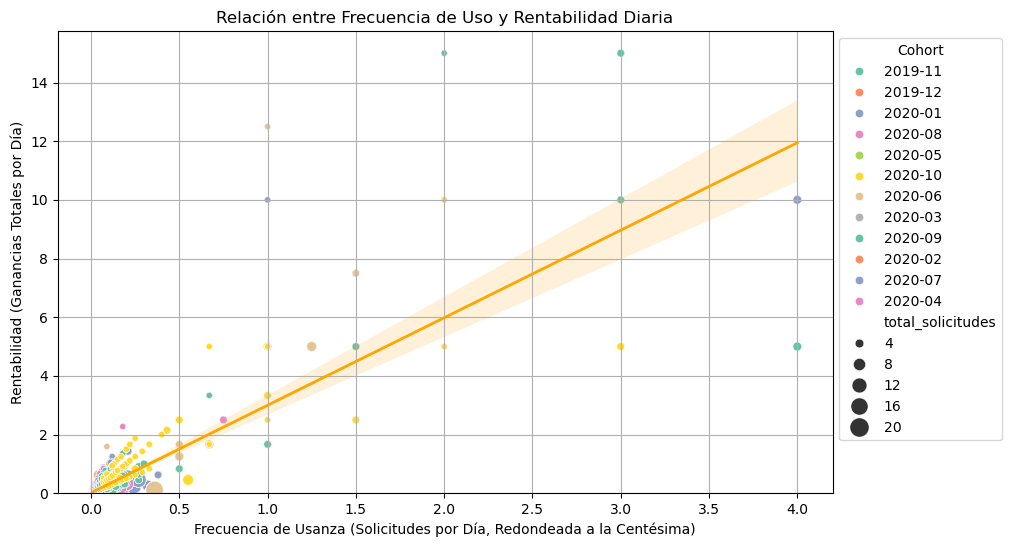

In [46]:
# 24. En busqueda de un usuario rentable, vamos a verificar quienes son los mas rentables en relacion a su frecuencia
print("\n\033[1m\033[95mPARTE 24: Relación entre frecuencia de usos y rentabilidad de usuarios\033[0m")

# 24.1 Filtrar usuarios que han usado el servicio más de una vez
usuarios_multiples = df_cash['user_id'].value_counts()
df_cash_multiples = df_cash[df_cash['user_id'].isin(usuarios_multiples[usuarios_multiples > 1].index)]

# 24.2 Calcular el número total de solicitudes y días de observación por usuario
frecuencia_por_usuario = df_cash_multiples.groupby('user_id').agg(
    total_solicitudes=('id', 'count'),
    dias_observacion=('created_at', lambda x: (x.max() - x.min()).days + 1)
).reset_index()

# 24.3 Calcular la frecuencia de uso y redondearla
frecuencia_por_usuario['frecuencia'] = frecuencia_por_usuario['total_solicitudes'] / frecuencia_por_usuario['dias_observacion']
frecuencia_por_usuario['frecuencia_redondeada'] = frecuencia_por_usuario['frecuencia'].round(2)

# 24.4 Filtrar y calcular las ganancias totales por usuario
df_combinados = df_fees[df_fees['status'] == 'accepted'].merge(df_cash[['id', 'user_id']], left_on='cash_request_id', right_on='id')
df_combinados = df_combinados.merge(frecuencia_por_usuario[['user_id', 'frecuencia_redondeada']], on='user_id')
ganancias_por_usuario = df_combinados.groupby('user_id')['total_amount'].sum().reset_index(name='ganancias')

# 24.5 Combinar datos de frecuencia y ganancias
df_frecuencia_ganancias = frecuencia_por_usuario.merge(ganancias_por_usuario, on='user_id')

# 24.6 Calcular la rentabilidad
df_frecuencia_ganancias['rentabilidad'] = df_frecuencia_ganancias['ganancias'] / df_frecuencia_ganancias['dias_observacion']

# 24.7 Hacer un merge para obtener la columna cohort y obtener un dato más
df_frecuencia_ganancias_cohort = df_frecuencia_ganancias.merge(df_cash[['user_id', 'cohort']], on='user_id')
df_frecuencia_ganancias_cohort['cohort'] = df_frecuencia_ganancias_cohort['cohort'].dt.strftime('%Y-%m')

# 24.8 Visualizar la relación mediante un gráfico de dispersión
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='frecuencia_redondeada', y='rentabilidad', hue='cohort', size='total_solicitudes',
                               data=df_frecuencia_ganancias_cohort, sizes=(20, 200), palette='Set2', legend='brief')

# 24.9 Añadir línea de tendencia
sns.regplot(x='frecuencia_redondeada', y='rentabilidad', data=df_frecuencia_ganancias_cohort, scatter=False, color='orange', line_kws={"linewidth": 2})

# 24.10 Graficar
plt.ylim(0)
plt.title('Relación entre Frecuencia de Uso y Rentabilidad Diaria')
plt.xlabel('Frecuencia de Usanza (Solicitudes por Día, Redondeada a la Centésima)')
plt.ylabel('Rentabilidad (Ganancias Totales por Día)')
plt.grid(True)
handles, labels = scatter_plot.get_legend_handles_labels()
scatter_plot.legend(handles=handles[1:], labels=labels[1:], title='Cohort', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()



El gráfico muestra una clara correlación positiva entre la frecuencia de uso y la rentabilidad de los usuarios: a mayor frecuencia, mayor es la rentabilidad. Sin embargo, la mayoría de los usuarios tiene una frecuencia baja (entre 0.0 y 0.5 solicitudes por día), lo que indica poca recurrencia. Esto representa una oportunidad de crecimiento significativo para la plataforma, ya que fomentar un mayor uso en los usuarios menos frecuentes podría incrementar considerablemente la rentabilidad general.


PARTE 25: Tasa de Retención de Clientes


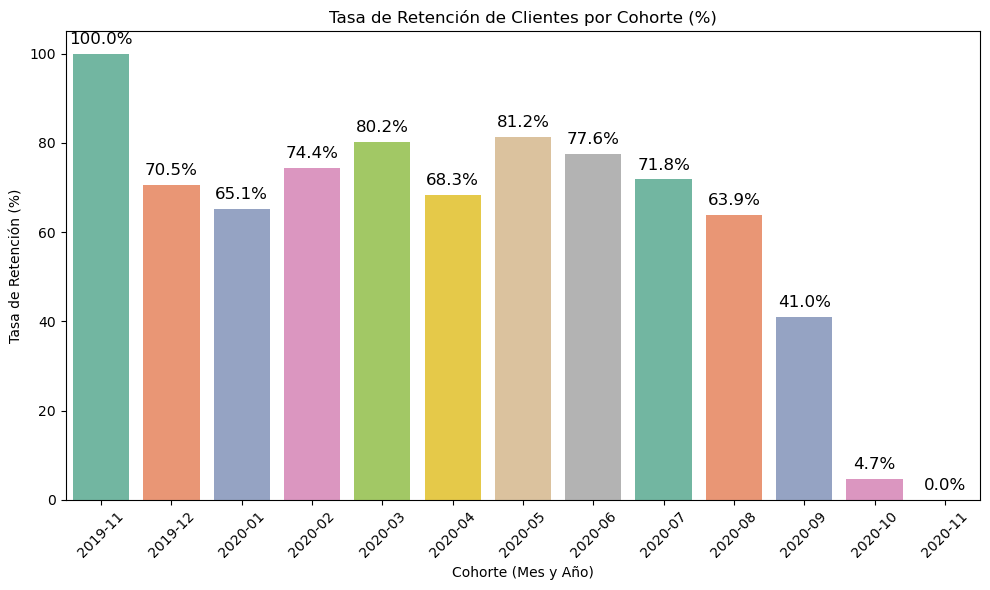

In [77]:
# Parte 25: Tasa de Retención de Clientes
# Como analisis extra hemos calculado la tasa de retencion de clientes.
print("\n\033[1m\033[95mPARTE 25: Tasa de Retención de Clientes\033[0m")
# 25.1 Definir clientes activos
active_clients = df_cash.groupby(['cohort', 'user_id']).size().reset_index(name='requests_count')
# 25.2 Calcular el número de clientes por cohorte
total_clients_per_cohort = active_clients.groupby('cohort')['user_id'].nunique().reset_index(name='total_clients')
# 25.3 Calcular el número de clientes que realizaron mas de una solicitud
returning_clients = active_clients[active_clients['requests_count'] > 1].groupby('cohort')['user_id'].nunique().reset_index(name='returning_clients')
# 25.4 Calcular la tasa de retención
retention_rate = total_clients_per_cohort.merge(returning_clients, on='cohort', how='left')
retention_rate['retention_rate'] = (retention_rate['returning_clients'] / retention_rate['total_clients']) * 100
retention_rate.fillna(0, inplace=True)
# 25.5 Mostrar la tasa de retención por cohorte
#print("Tasa de retención por cohorte:")
#display(retention_rate[['cohort', 'retention_rate']])
# 25.6 Convertir la columna 'cohort' a formato 'AAAA-MM'
retention_rate['cohort'] = retention_rate['cohort'].dt.strftime('%Y-%m')
# 25.7 Visualización de la tasa de retención por cohorte
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='cohort', y='retention_rate', hue="cohort", data=retention_rate, palette='Set2')
plt.xticks(rotation=45)
plt.title('Tasa de Retención de Clientes por Cohorte (%)')
plt.xlabel('Cohorte (Mes y Año)')
plt.ylabel('Tasa de Retención (%)')
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.1f}%',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom',
                      fontsize=12, color='black',
                      xytext=(0, 5),
                      textcoords='offset points')
plt.tight_layout()
plt.show()

Consideramos un usuario activo a aquel que ha realizado al menos dos solicitudes durante el período de análisis. El gráfico muestra que la tasa de retención de usuarios disminuye con el tiempo. Esta baja retención en las cohortes más recientes puede deberse a que estos usuarios todavía no han tenido tiempo suficiente para hacer más de una transacción, ya que la frecuencia media es de 35 días. Por lo tanto, es posible que estos números mejoren a medida que los usuarios tengan más oportunidades de interactuar con el servicio. Es importante seguir observando estas tasas a medida que pase el tiempo.